## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [3]:
# If you didn't download it yet, please get the relevant file now!
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P  /mnt/c/Users/Beatrice/Desktop/LaboratoryOfComputationalPhysics_Y4_Copia/

--2021-12-05 23:33:08--  https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.66.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.66.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/xvjzaxzz3ysphme/data_000637.txt [following]
--2021-12-05 23:33:09--  https://www.dropbox.com/s/raw/xvjzaxzz3ysphme/data_000637.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4864a8fdf11e7491bb0d7d9f63.dl.dropboxusercontent.com/cd/0/inline/BbTCLKFqOvgXP9M-XReRMi7D2H5f_nbd4M-Fv9mqg0CnhRMDuN2_GjduTXmvH_WI-QMIB_OXooVp_XL5531_j-FOkWaBFgN_oiESXwgsv4yCLJ8SicprqM6OSEnbmiTPPE3XRuEAjk3z8IH3oC_X8R8x/file# [following]
--2021-12-05 23:33:09--  https://uc4864a8fdf11e7491bb0d7d9f63.dl.dropboxusercontent.com/cd/0/inline/BbTCLKFqOvgXP9M-XReRMi7D2H5f_nbd4M-Fv9mqg0CnhRMDuN2_GjduTXmvH_WI-QMIB_OXooVp_X

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

2\. Find out the number of BX in a ORBIT (the value 'x').

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

6\. Create a new DataFrame that contains only the rows with HEAD=1.

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

1. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = pd.read_csv("data_000637.txt")
print("max number of rows: ", len(file))
N = np.random.randint(10000,len(file))
print("Number N: ", N)
DataFrame = file[:N]
DataFrame

max number of rows:  1310720
Number N:  280221


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
280216,1,1,139,3869202958,2058,0
280217,1,1,3,3869202958,2057,17
280218,1,0,123,3869202958,2059,16
280219,1,1,8,3869202958,2053,2


2. Find out the number of BX in a ORBIT (the value 'x').

In [18]:
x = DataFrame["BX_COUNTER"].max() #/DataFrame["ORBIT_CNT"]
x

3563

3. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

In [19]:
time = x*25*DataFrame["ORBIT_CNT"] + DataFrame["BX_COUNTER"]*25 + DataFrame["TDC_MEAS"]*(25/30)
print(time)
dur = time.max()-time.min()
print("\nTime acquisition for a fraction of measurements: ",dur*1e-9, "s\n")

time = x*25*file["ORBIT_CNT"] + file["BX_COUNTER"]*25 + file["TDC_MEAS"]*(25/30)
print(time)
dur = time.max()-time.min()
print("\nTime acquisition for all measurements: ",dur*1e-9, "s")

0         3.446490e+14
1         3.446490e+14
2         3.446490e+14
3         3.446490e+14
4         3.446490e+14
              ...     
280216    3.446493e+14
280217    3.446493e+14
280218    3.446493e+14
280219    3.446493e+14
280220    3.446493e+14
Length: 280221, dtype: float64

Time acquisition for a fraction of measurements:  0.24860053750000002 s

0          3.446490e+14
1          3.446490e+14
2          3.446490e+14
3          3.446490e+14
4          3.446490e+14
               ...     
1310715    3.446500e+14
1310716    3.446500e+14
1310717    3.446500e+14
1310718    3.446500e+14
1310719    3.446500e+14
Length: 1310720, dtype: float64

Time acquisition for all measurements:  0.9801411533125001 s


4. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

In [20]:
DataFrame["Abs time in ns"] = x*25*DataFrame["ORBIT_CNT"] + DataFrame["BX_COUNTER"]*25 + DataFrame["TDC_MEAS"]*(25/30)
DataFrame

/tmp/ipykernel_43/3035529082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataFrame["Abs time in ns"] = x*25*DataFrame["ORBIT_CNT"] + DataFrame["BX_COUNTER"]*25 + DataFrame["TDC_MEAS"]*(25/30)


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Abs time in ns
0,1,0,123,3869200167,2374,26,3.446490e+14
1,1,0,124,3869200167,2374,27,3.446490e+14
2,1,0,63,3869200167,2553,28,3.446490e+14
3,1,0,64,3869200167,2558,19,3.446490e+14
4,1,0,64,3869200167,2760,25,3.446490e+14
...,...,...,...,...,...,...,...
280216,1,1,139,3869202958,2058,0,3.446493e+14
280217,1,1,3,3869202958,2057,17,3.446493e+14
280218,1,0,123,3869202958,2059,16,3.446493e+14
280219,1,1,8,3869202958,2053,2,3.446493e+14


5. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

In [21]:
rn = pd.Series(np.random.randint(0,2,N))
DataFrame['HEAD'] = rn
DataFrame

/tmp/ipykernel_43/823805984.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataFrame['HEAD'] = rn


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Abs time in ns
0,0,0,123,3869200167,2374,26,3.446490e+14
1,1,0,124,3869200167,2374,27,3.446490e+14
2,0,0,63,3869200167,2553,28,3.446490e+14
3,0,0,64,3869200167,2558,19,3.446490e+14
4,1,0,64,3869200167,2760,25,3.446490e+14
...,...,...,...,...,...,...,...
280216,0,1,139,3869202958,2058,0,3.446493e+14
280217,1,1,3,3869202958,2057,17,3.446493e+14
280218,0,0,123,3869202958,2059,16,3.446493e+14
280219,1,1,8,3869202958,2053,2,3.446493e+14


6. Create a new DataFrame that contains only the rows with HEAD=1.

In [22]:
new_df = DataFrame[DataFrame.HEAD != 0]
new_df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Abs time in ns
1,1,0,124,3869200167,2374,27,3.446490e+14
4,1,0,64,3869200167,2760,25,3.446490e+14
9,1,0,60,3869200167,2788,7,3.446490e+14
10,1,1,7,3869200167,2785,4,3.446490e+14
12,1,1,6,3869200167,2792,18,3.446490e+14
...,...,...,...,...,...,...,...
280212,1,1,128,3869202958,2002,22,3.446493e+14
280213,1,1,1,3869202958,2052,20,3.446493e+14
280214,1,0,60,3869202958,2055,28,3.446493e+14
280217,1,1,3,3869202958,2057,17,3.446493e+14


7. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

Text(0.5, 1.0, 'Counts per TDC channel')

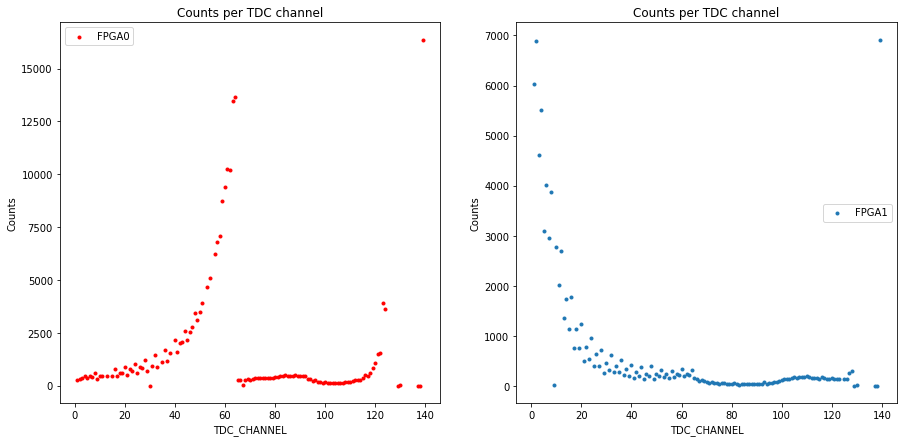

In [62]:
#Count the channel for fpga 0,1
F0 = DataFrame[DataFrame["FPGA"]==0]["TDC_CHANNEL"].value_counts()
F1 = DataFrame[DataFrame["FPGA"]==1]["TDC_CHANNEL"].value_counts()

#normalized
F0_n = DataFrame[DataFrame["FPGA"]==0]["TDC_CHANNEL"].value_counts(normalize=True)
F1_n = DataFrame[DataFrame["FPGA"]==1]["TDC_CHANNEL"].value_counts(normalize=True)

#Plot
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15,7))
ax0.scatter(F0.index,F0.values, c = "red",marker = ".", label = "FPGA0")
ax1.scatter(F1.index,F1.values, marker = ".", label = "FPGA1")
ax1.legend(loc = 'best')
ax1.set_xlabel('TDC_CHANNEL')
ax1.set_ylabel('Counts')
ax1.set_title('Counts per TDC channel')
ax0.legend(loc = 'best')
ax0.set_xlabel('TDC_CHANNEL')
ax0.set_ylabel('Counts')
ax0.set_title('Counts per TDC channel')

8. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

In [63]:
#Not all data in file (to use alldata: DataFrame->file)
#Reset HEAD to 1
DataFrame['HEAD'] = pd.Series(1,index = DataFrame.index)
#Count the equal values
#group = DataFrame.groupby(['FPGA','TDC_CHANNEL']).sum()
DataFrame_agg = DataFrame.groupby(['FPGA','TDC_CHANNEL']).agg({'HEAD':sum})
g = DataFrame_agg['HEAD'].groupby('FPGA', group_keys=False)
#res = g.apply(lambda x: x.sort_values(ascending=False).head(3))
g.nlargest(3)

/tmp/ipykernel_43/2528725868.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataFrame['HEAD'] = pd.Series(1,index = DataFrame.index)


FPGA  TDC_CHANNEL
0     139            16367
      64             13632
      63             13465
1     139             6916
      2               6887
      1               6024
Name: HEAD, dtype: int64

9. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [79]:
#Count the number of unique orbits.
sum_orbit = file.groupby('ORBIT_CNT').sum()
unique = sum_orbit[sum_orbit['HEAD']==1]
print("Number of unique orbits: ",len(unique))
unique

Number of unique orbits:  2


,HEAD,FPGA,TDC_CHANNEL,BX_COUNTER,TDC_MEAS
ORBIT_CNT,,,,,
3869204142,1,0,63,3121,15
3869206180,1,0,65,3062,9


In [87]:
#Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139
sum_orbit_139 = file[file['TDC_CHANNEL'] == 139].groupby('ORBIT_CNT').sum()
unique_139 = sum_orbit_139[sum_orbit_139['HEAD']==1]
print("The number of unique orbits with at least one measurement from TDC_CHANNEL=139: ",len(unique_139))
unique_139

The number of unique orbits with at least one measurement from TDC_CHANNEL=139:  51


,HEAD,FPGA,TDC_CHANNEL,BX_COUNTER,TDC_MEAS
ORBIT_CNT,,,,,
3869200471,1,0,139,44,0
3869200685,1,0,139,3365,0
3869201150,1,0,139,3022,0
3869201336,1,1,139,3136,0
3869201354,1,0,139,3228,0
3869201637,1,0,139,2907,0
3869201671,1,0,139,644,0
3869202062,1,0,139,69,0
3869202503,1,0,139,1643,0
